# Stock Price Prediction: Tesla Case Study

"Stock Price Prediction: Tesla Case Study" is a project designed for both learning and offering valuable insights to individuals interested in understanding and forecasting stock market trends. Using historical stock data and various analytical techniques, this project aims to educate users on the intricacies of predicting Tesla's stock prices. By sharing insights and predictive models, it empowers investors and enthusiasts to make more informed decisions when dealing with Tesla's stock.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Data Preparation and Preprocessing 

In [2]:
#The path to the csv file
file_path = "../data/TSLA.csv"
#Load the dataset
dataset = pd.read_csv(file_path)
#Get first 5 elements
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
#Get last 5 elements
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2/3/2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [4]:
#Check for missing values
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#Get dataset shape
dataset.shape

(2416, 7)

In [6]:
#Get dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [7]:
#Change Date column into date-time format
dataset["Date"] = pd.to_datetime(dataset["Date"])

In [8]:
# #Get dataset information
# dataset.info()

In [9]:
#Get the date range
[min(dataset["Date"]), max(dataset["Date"])]

[Timestamp('2010-06-29 00:00:00'), Timestamp('2020-02-03 00:00:00')]

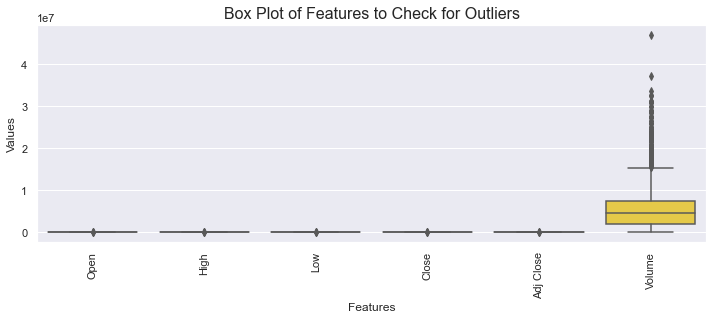

In [12]:
#Checking for outliers
plt.figure(figsize=(12, 4))
sns.boxplot(data=dataset, orient="v", palette="Set2")
plt.xticks(rotation=90)
plt.title("Box Plot of Features to Check for Outliers", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Values")

plt.show()

In [11]:
#Decided not to handle outliers in this case, as I assume that they didn't happen due to errors, 
#instead they happened due to extreme market events as assumption
#Moreover, during data engineering, I intend to use data scaling which will help in this case.